In [701]:
import numpy as np
import pandas as pd


In [702]:
from urllib.request import urlretrieve

In [703]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1f0959a05d0>)

In [704]:
medical_df = pd.read_csv('medical.csv')

In [705]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [706]:
non_smokder_df = medical_df[medical_df['smoker']=='no']

<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

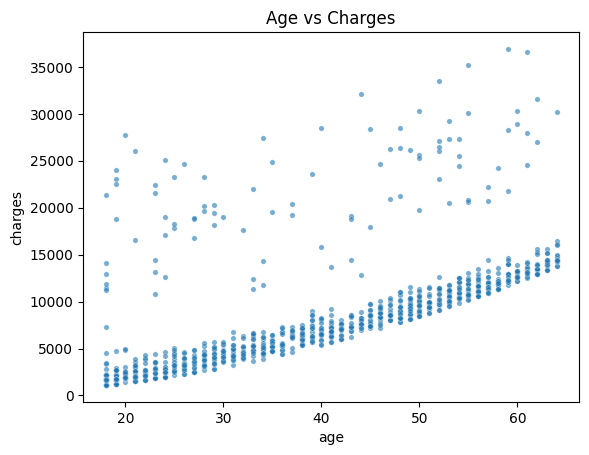

In [707]:
plt.title('Age vs Charges')
sns.scatterplot(data=non_smokder_df,x='age',y='charges',alpha=.6,s=15)

In [708]:
def estimate_charges(age,w,b):
    return w*age+b

In [709]:
w = 50 
b=100
ages = non_smokder_df['age']

In [710]:
def RMSE(targets,predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [711]:
def try_parameters(w,b):
    ages =non_smokder_df['age']
    target = non_smokder_df['charges']
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,'r',alpha=.8)
    plt.scatter(ages,target,s=8,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])
    
    loss = RMSE(target,estimated_charges)
    print("RMSE Loss : ",loss)

RMSE Loss :  4674.310716408083


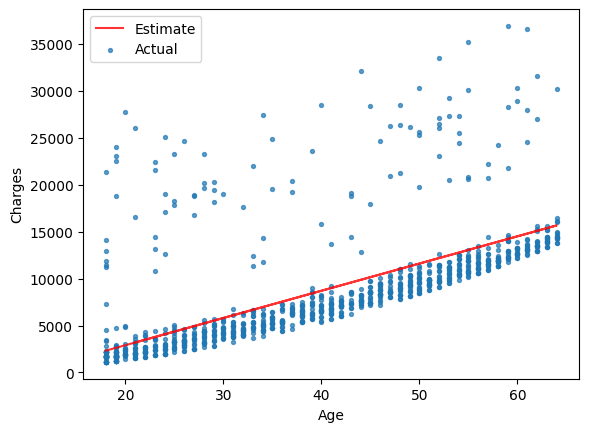

In [712]:
try_parameters(290,-2900)

In [713]:
target =  non_smokder_df['charges']
predicted = estimate_charges(non_smokder_df.age,288,-3050)

In [714]:
RMSE(target,predicted)

np.float64(4673.783330850903)

In [715]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [716]:
model = LinearRegression()

In [717]:
inputs = non_smokder_df[['age']]
targets = non_smokder_df['charges']
print('input shape : ',inputs.shape)
print('target shape: ',targets.shape)

input shape :  (1064, 1)
target shape:  (1064,)


In [718]:
model.fit(inputs,targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [719]:
ages = pd.DataFrame({'age': [23,37,61]})
model.predict(ages)

array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [720]:
# w 
model.coef_

array([267.24891283])

In [721]:
# b 
model.intercept_

np.float64(-2091.4205565650864)

In [722]:
model2 = SGDRegressor()

In [723]:
model2.fit(inputs,targets)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [724]:
model2.predict([[31]])

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but SGDRegressor was fitted with feature names



array([5277.15680646])

RMSE Loss :  5260.26580943772


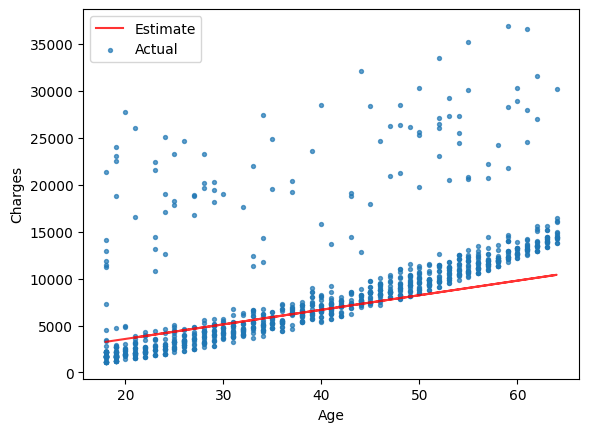

In [725]:
try_parameters(model2.coef_,model2.intercept_)

RMSE Loss :  4662.505766636395


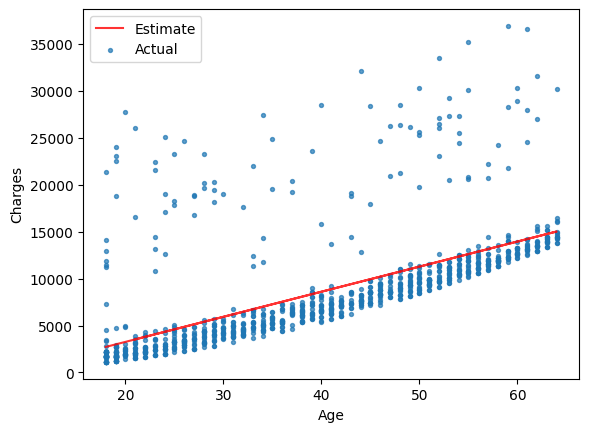

In [726]:
try_parameters(model.coef_,model.intercept_)

In [727]:
smoker_df=medical_df[medical_df['smoker']=='yes']

In [728]:
def try_parameters_smokers(w,b):
    ages =smoker_df['age']
    target = smoker_df['charges']
    
    estimated_charges = estimate_charges(ages,w,b)
    
    plt.plot(ages,estimated_charges,'r',alpha=.8)
    plt.scatter(ages,target,s=8,alpha=.7)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate','Actual'])
    
    loss = RMSE(target,estimated_charges)
    print("RMSE Loss : ",loss)

In [729]:
smoker_inputs = smoker_df[['age']]
smoker_target = smoker_df['charges']
print('input shape : ',smoker_inputs.shape)
print('target shape: ',smoker_target.shape)


input shape :  (274, 1)
target shape:  (274,)


In [730]:
model.fit(smoker_inputs,smoker_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


RMSE Loss :  10711.00334810241


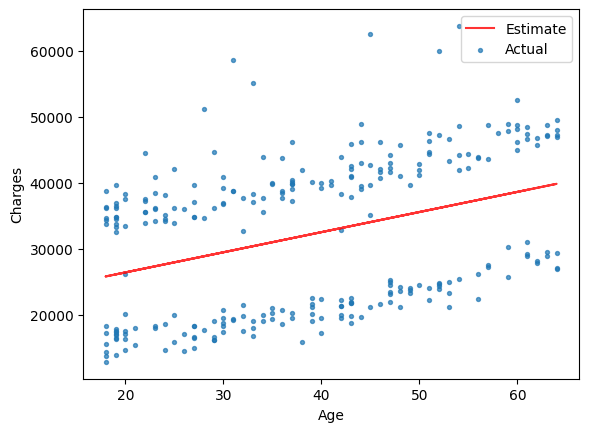

In [731]:
try_parameters_smokers(model.coef_,model.intercept_)

In [732]:
model.predict([[30]])

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29451.25619021])

In [733]:
smoker_df[smoker_df['age']==30]

,age,sex,bmi,children,smoker,region,charges
19,30,male,35.300,0,yes,southwest,36837.46700
144,30,male,28.690,3,yes,northwest,20745.98910
158,30,male,35.530,0,yes,southeast,36950.25670
465,30,female,28.380,1,yes,southeast,19521.96820
609,30,male,37.800,2,yes,southwest,39241.44200
725,30,female,39.050,3,yes,southeast,40932.42950
780,30,male,24.400,3,yes,southwest,18259.21600
1000,30,male,22.990,2,yes,northwest,17361.76610
1314,30,female,23.655,3,yes,northwest,18765.87545


In [734]:
inputs = non_smokder_df[['age','bmi']]
targets = non_smokder_df['charges']

model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)
predictions
loss = RMSE(targets,predictions)
print("Loss: ",loss)


Loss:  4662.3128354612945


In [735]:
non_smokder_df['charges'].corr(non_smokder_df['bmi'])

np.float64(0.08403654312833271)

In [736]:
fig  = px.scatter(non_smokder_df,x='bmi',y='charges',title='Bmi Vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [737]:

bmi =non_smokder_df[['bmi']]
target = non_smokder_df['charges']

model = LinearRegression().fit(bmi,target)

predictions=model.predict(bmi)

5969.772531913293


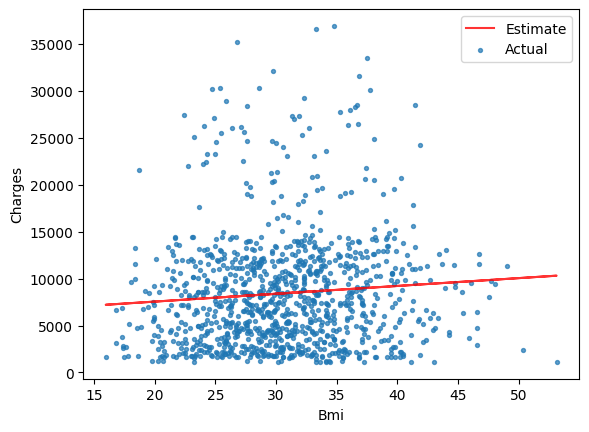

In [738]:
estimated_charges = estimate_charges(bmi,model.coef_,model.intercept_)
    
plt.plot(bmi,estimated_charges,'r',alpha=.8)
plt.scatter(bmi,target,s=8,alpha=.7)
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])
loss = RMSE(target,predictions)
print(loss)

In [739]:
non_smokder_df.charges.corr(non_smokder_df.children)

np.float64(0.13892870453542205)

In [740]:
fig = px.strip(non_smokder_df,x='children',y='charges',title='Children Vs Charges')
fig.update_traces(marker_size=3,marker_opacity=.5)
fig.show()

In [741]:
inputs = non_smokder_df[['age','bmi','children']]
target = non_smokder_df['charges']

model = LinearRegression().fit(inputs,target)
predictions  = model.predict(inputs)
loss = RMSE(target,predictions)
print(loss)

4608.470405038246


In [742]:
fig = px.scatter(smoker_df,x='bmi',y='charges',title='BMI Vs Charges')
fig.update_traces(marker_size=4)
fig.show()

In [743]:
inputs = smoker_df[['bmi']]
target = smoker_df['charges']
model= LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)


6811.59740830196


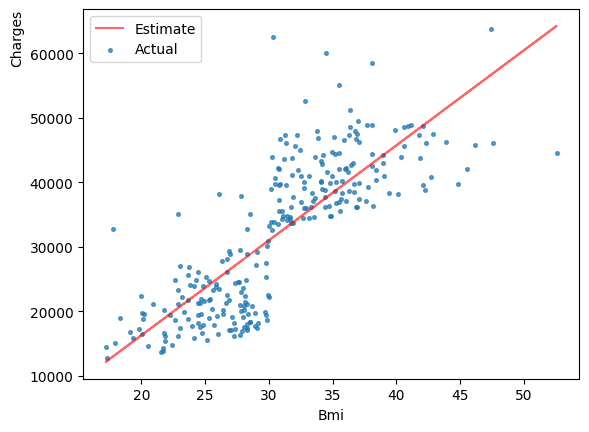

In [744]:
plt.plot(inputs,predictions,'r',alpha=.6)
plt.scatter(inputs,target,s=7,alpha=.7)
plt.xlabel('Bmi')
plt.ylabel('Charges',loc='top')
plt.legend(['Estimate','Actual'])

print(RMSE(target,predictions))

<Axes: >

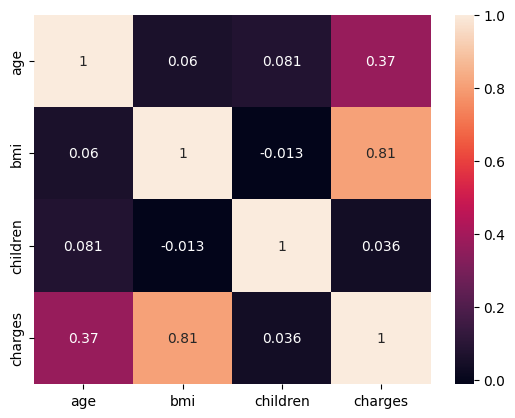

In [745]:
sns.heatmap(smoker_df.corr(numeric_only=True),annot=True)

In [746]:
fig = px.scatter(smoker_df,x='age',y='charges',title='Age vs Children')
#fig.update_traces(marker_line=4,marker_opacity=.5)
fig.show()

In [747]:
inputs = smoker_df[['age','bmi']]
target=smoker_df['charges']
model=LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)
print(RMSE(target,predictions))

5722.782238884456


In [748]:
inputs = medical_df[['age','bmi','children']]
target = medical_df['charges']

model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)

print(RMSE(target,predictions))



11355.317901125973


In [749]:
px.scatter(medical_df,x='age',y='charges',color='smoker')

<Axes: xlabel='smoker', ylabel='charges'>

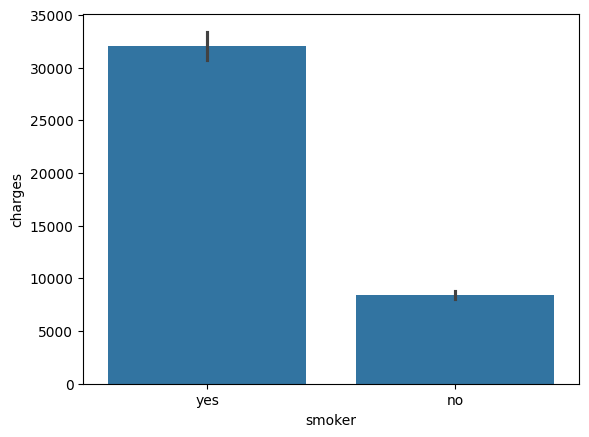

In [750]:
sns.barplot(data=medical_df,x='smoker',y='charges')

In [751]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker_code'] =medical_df['smoker'].map(smoker_codes)

In [752]:
medical_df['charges'].corr(medical_df['smoker_code'])

np.float64(0.7872514304984778)

In [753]:
inputs = medical_df[['age','bmi','children','smoker_code']]
target = medical_df['charges']

model = LinearRegression().fit(inputs,target)

predictions=model.predict(inputs)

print(RMSE(target,predictions))

6056.439217188081


In [754]:
sex_codes={'female':0,'male':1}

medical_df['sex_code']=medical_df['sex'].map(sex_codes)

medical_df['charges'].corr(medical_df['sex_code'])

np.float64(0.05729206220202533)

<Axes: xlabel='region', ylabel='charges'>

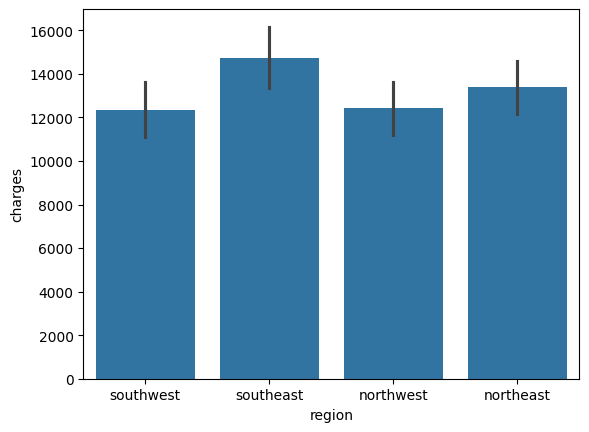

In [755]:
sns.barplot(data=medical_df,x='region',y='charges')

In [756]:
from sklearn import preprocessing
enc=preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [757]:
enc.transform([['northeast']
               ,['northwest']]).toarray()

C:\Users\danie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [758]:
one_hot=enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [759]:
medical_df[['northeast','northwest','southeast','southwest']]=one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


In [760]:
inputs_cols= ['age','bmi','children','sex_code','smoker_code','northeast','northwest','southeast','southwest']
inputs = medical_df[inputs_cols]
target=medical_df['charges']\
    
model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)
    
print(RMSE(target,predictions))

6041.679651174452


In [761]:
medical_df[inputs_cols].loc[10]

age            25.00
bmi            26.22
children        0.00
sex_code        1.00
smoker_code     0.00
northeast       1.00
northwest       0.00
southeast       0.00
southwest       0.00
Name: 10, dtype: float64

In [762]:
weights_df=pd.DataFrame({
    'feature':np.append(inputs_cols,'intercept'),
    'weight': np.append(model.coef_,model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,sex_code,-131.314359
4,smoker_code,23848.534542
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,intercept,-12525.547811


In [763]:
from sklearn.preprocessing import StandardScaler

In [764]:
numeric_cols = ['age','bmi','children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

,copy,True
,with_mean,True
,with_std,True


In [765]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [766]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [767]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]], shape=(1338, 3))

In [768]:
cat_cols = [x for x in inputs_cols if x not in numeric_cols]
cat_data = medical_df[cat_cols].values
cat_data

array([[0., 1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.]], shape=(1338, 6))

In [769]:
inputs = np.concatenate((scaled_inputs,cat_data),axis=1)
target = medical_df.charges

model = LinearRegression().fit(inputs,target)

predictions = model.predict(inputs)

print(RMSE(target,predictions))

6041.679651174452


In [770]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols+cat_cols,'intercept'),
    'weight': np.append(model.coef_,model.intercept_)})
weights_df.sort_values(by='weight',ascending=False)

,feature,weight
4,smoker_code,23848.534542
9,intercept,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
3,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [771]:
from sklearn.model_selection import train_test_split

In [772]:
inputs=medical_df[['age','bmi','children','smoker_code','sex_code']]
targets=medical_df['charges']

In [773]:
inputs_train,inputs_test,targets_train,targets_test = train_test_split(inputs,targets,test_size=.1)

In [774]:
model = LinearRegression().fit(inputs_train,targets_train)

predictions_tests = model.predict(inputs_test)

print(RMSE(targets_test,predictions_tests))

5849.254677975748
